In [1]:
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    
    get_folders_by_plate_id,
)
import sys

import os
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)

import pandas as pd
import json
from time import time_ns
from amftrack.util.sys import temp_path
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    reconstruct_image_from_general,
    plot_full,
)
directory_targ = os.path.join(directory_scratch,'stitch_temp2')+'/'

update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


analysed:   0%|          | 0/1596 [00:00<?, ?it/s]

In [51]:
temp_path

'/scratch-shared/amftrack/temp'

In [22]:
select_folders['folder']<="20220713_0831_Plate11"

17       True
32       True
40       True
61       True
69       True
        ...  
1567     True
1568    False
1574     True
1576    False
1590     True
Name: folder, Length: 235, dtype: bool

In [2]:
exp = Experiment(directory_targ)
select_folders = all_folders.loc[(all_folders["unique_id"]=='510_20220623')*(all_folders['folder']<="20220713_0831_Plate11")]
exp.load(select_folders)


/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2022-06-24 13:41:00
2022-06-24 16:11:00
2022-06-24 18:11:00
2022-06-24 20:36:00
2022-06-24 22:36:00
2022-06-25 00:36:00
2022-06-25 02:37:00
2022-06-25 04:37:00
2022-06-25 06:37:00
2022-06-25 08:37:00
2022-06-25 10:37:00
2022-06-25 12:37:00
2022-06-25 14:37:00
2022-06-25 16:37:00
2022-06-25 18:37:00
2022-06-25 20:37:00
2022-06-25 22:37:00
2022-06-26 00:37:00
2022-06-26 02:37:00
2022-06-26 04:37:00
2022-06-26 06:37:00
2022-06-26 08:37:00
2022-06-26 10:37:00
2022-06-26 12:37:00
2022-06-26 14:37:00
2022-06-26 16:37:00
2022-06-26 18:37:00
2022-06-26 20:37:00
2022-06-26 22:37:00
2022-06-27 00:37:00
2022-06-27 02:37:00
2022-06-27 04:37:00
2022-06-27 06:37:00
2022-06-27 08:37:00
2022-06-27 10:37:00
2022-06-27 12:37:00
2022-06-27 16:31:00
2022-06-27 20:30:00
2022-06-28 00:31:00
2022-06-28 04:31:00
2022-06-28 08:30:00
2022-06-28 12:31:00
2022-06-28 14:30:00
2022-06-28 17:13:00
2022-06-28 21:13:00
2022-06-29 01:13:00
2022-06-29 05:13:00
2022-06-29 09:13:00
2022-06-29 11:29:00
2022-06-29 13:36:00


In [19]:
exp.dates.sort()


In [18]:
nodes_init= [node for node in exp.nodes if len(node.ts())>30]

In [ ]:

exp.load_compressed_skel()
exp.plot([20])

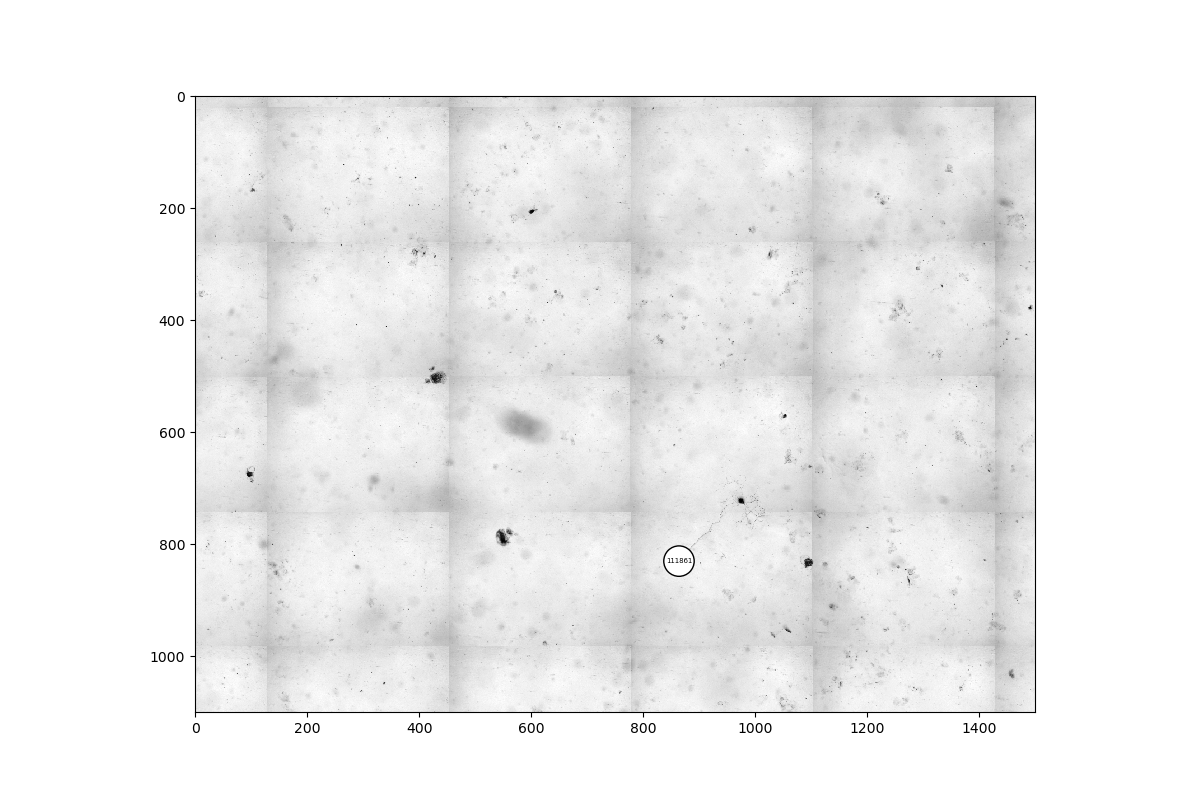

In [52]:
%matplotlib widget

t = 60
node_interest = [node for node in nodes_init if t in node.ts()]
node_interest = [hyph.end]

exp.load_tile_information(t)
plot_full_image_with_features(
    exp,
    t,
    downsizing=10,
    region=[[7000, 15000], [18000, 30000]],
    nodes=node_interest,
    edges=[],
    dilation=1,
    prettify=False,
    save_path = os.path.join(temp_path,f'{node_interest[0].label}_{t}_myr.png')
)

In [20]:
[node for node in node_interest if node.label==111861]

[Node(111861)]

In [22]:
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    get_hyphae
)

In [24]:
lim_considered = 30
hyphaes, problems = get_hyphae(exp,lim_considered=lim_considered)


0.0
Detected problems during hyphae detection, 23 hyphaes have inconsistent root over time


In [78]:
hyph = [hypha for hypha in hyphaes if hypha.end.label==111861][0]
hyph = [hypha for hypha in hyphaes if hypha.end.label==31929][0]

In [74]:
from amftrack.pipeline.functions.post_processing.time_hypha import *


In [79]:
times = [get_time_since_begin_exp(hyph,t,t+1,None)[1] for t in hyph.end.ts()[:-1]]

In [80]:
speeds = [get_speed(hyph,t,t+1,None)[1] for t in hyph.end.ts()[:-1]]

failure in finding closest edge


Text(0, 0.5, 'hypha 31929 growth speed ($\\mu m.h^-1$)')

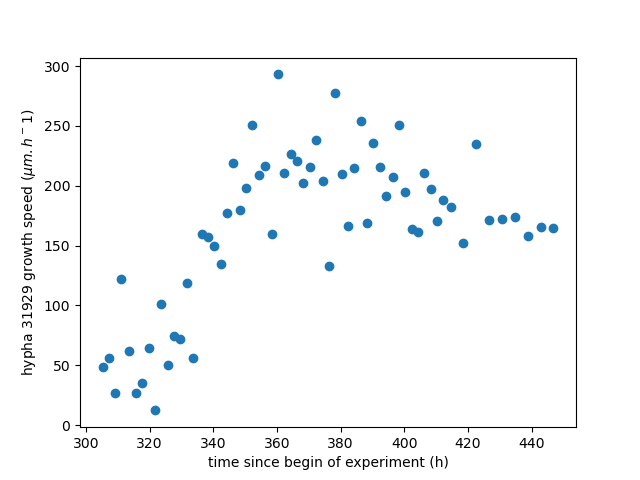

In [81]:
fix,ax=plt.subplots()
ax.scatter(times,speeds)
ax.set_xlabel("time since begin of experiment (h)")
ax.set_ylabel(f"hypha {hyph.end.label} growth speed ($\mu m.h^{-1}$)")

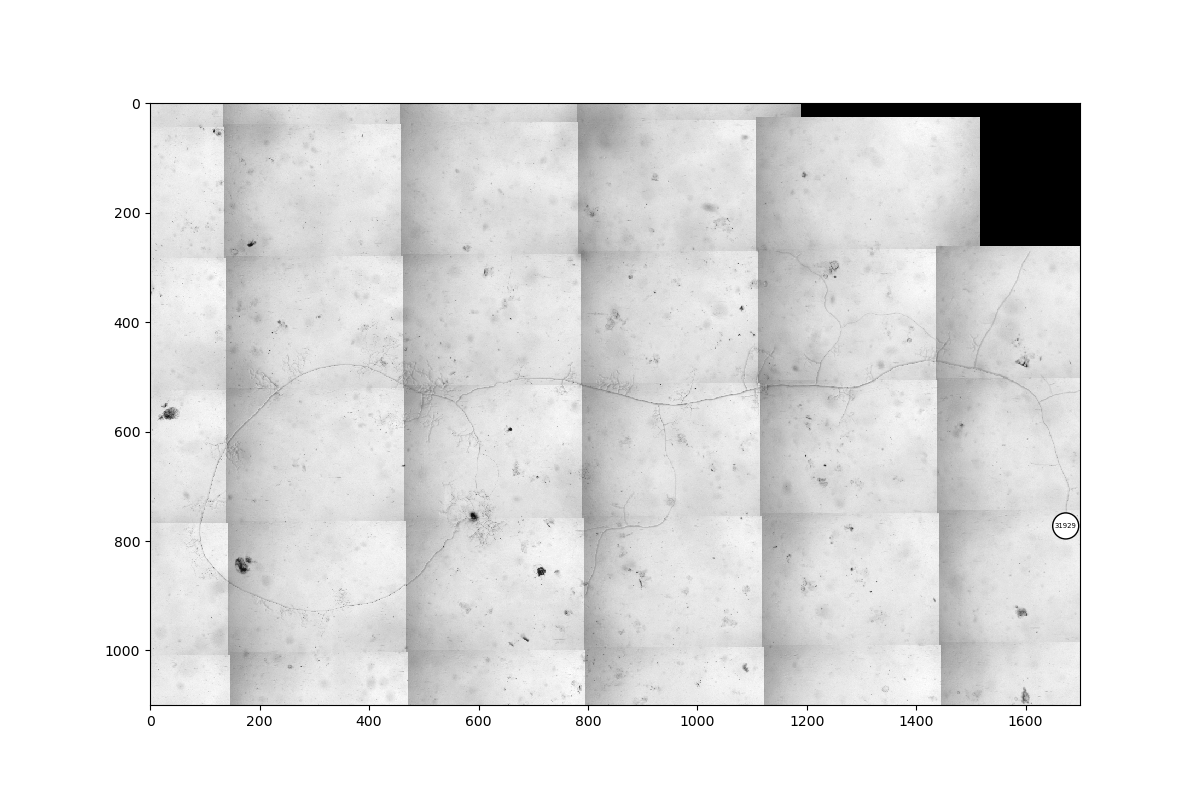

In [70]:
for t in hyph.end.ts()[:-1]:
    plt.close("all")
    node_interest = [hyph.end]

    exp.load_tile_information(t)
    plot_full_image_with_features(
        exp,
        t,
        downsizing=10,
        region=[[7000, 18000], [18000, 35000]],
        nodes=node_interest,
        edges=[],
        dilation=1,
        prettify=False,
        save_path = os.path.join(temp_path,f'{node_interest[0].label}_{t}_myr.png')
    )
    # break

In [71]:
from amftrack.util.video_util import make_video
paths = [os.path.join(temp_path,f'{node_interest[0].label}_{t}_myr.png') for t in hyph.end.ts()[:-1]]
texts = [f'{int(time)}h' for time in times]
make_video(paths,texts,None,save_path=f'video{hyph.end.label}.mp4')

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  